In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('titanic.csv')
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0


In [4]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [7]:
df.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [10]:
df['Cabin'].fillna("unknown",inplace=True)

In [13]:
df.isnull().sum()

Age            0
Cabin          0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
Family_Size    0
dtype: int64

In [14]:
df.duplicated().sum()

0

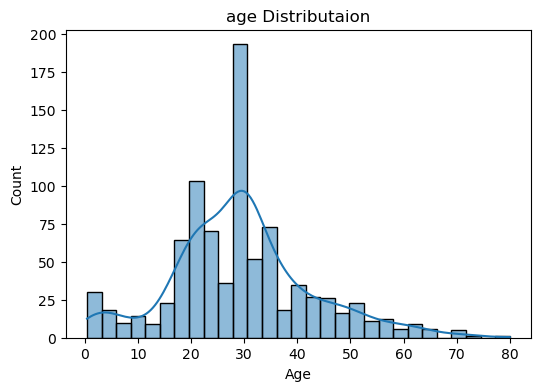

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"],kde=True)
plt.title("age Distributaion")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [28]:
gender=df['Sex'].value_counts().index
print(gender)


Index(['male', 'female'], dtype='object')
male      1
female    1
dtype: int64


In [29]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [31]:
gender_count=df['Sex'].value_counts()
print(gender_count)

male      577
female    314
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x1c546d74250>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

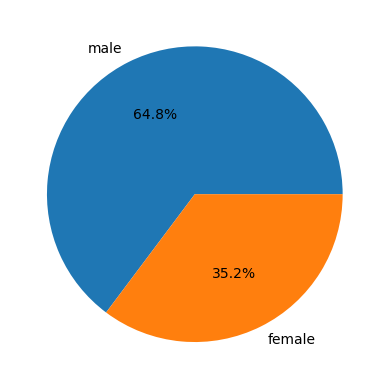

In [41]:
plt.pie(gender_count,labels=gender,autopct='%1.1f%%',rotatelabels=0)

342.0


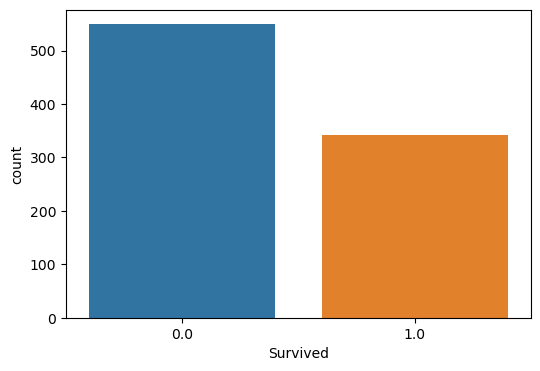

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived",data=df)


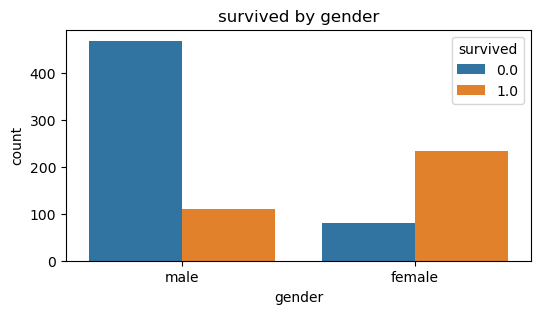

In [44]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("survived by gender")
plt.xlabel("gender")
plt.ylabel("count")
plt.legend(title="survived",loc="upper right")
plt.show()

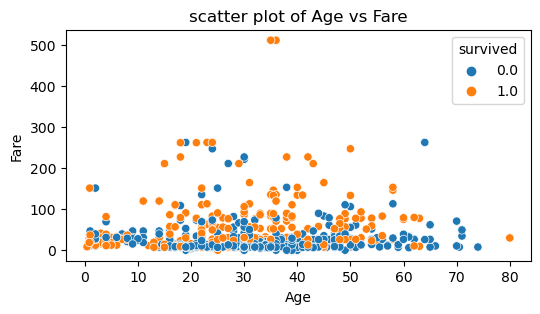

In [46]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x="Age",y='Fare',hue='Survived')
plt.title("scatter plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="survived")

plt.show()

In [51]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [53]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [55]:
df['Age'].value_counts()

30.00    144
22.00     63
24.00     30
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [71]:
# sex female survied more than male 
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0.0       female     81
          male      468
1.0       female    233
          male      109
Name: Survived, dtype: int64

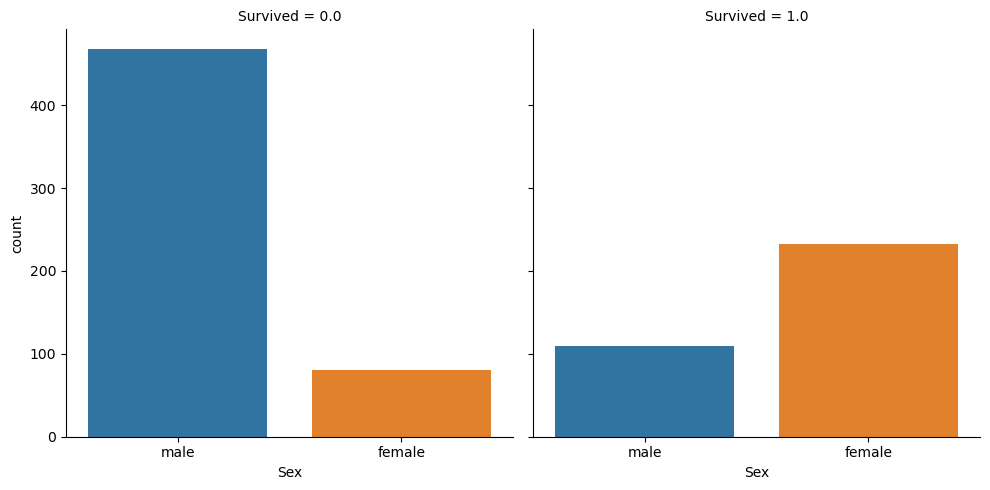

In [73]:
sns.catplot(x='Sex',col='Survived',kind='count',data=df)

In [75]:
print("% of women survived:",df[df.Sex=='female'].Survived.sum()/df[df.Sex=='female'].Survived.count())
print("% of male survived: ",df[df.Sex=="male"].Survived.sum()/df[df.Sex=='male'].Survived.count())

% of women survived: 0.7420382165605095
% of male survived:  0.18890814558058924


In [79]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap="Oranges")

Survived,0.000000,1.000000,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [1]:
# from next eda example 


In [6]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns 
%matplotlib inline

from matplotlib import pylab
#  set default matplot figure size 
pylab.rcParams['figure.figsize']=(10,8)

 


In [7]:
df=pd.read_csv('titanic.csv')


In [8]:
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [9]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [16]:
df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'number of passenger according to Pclass')

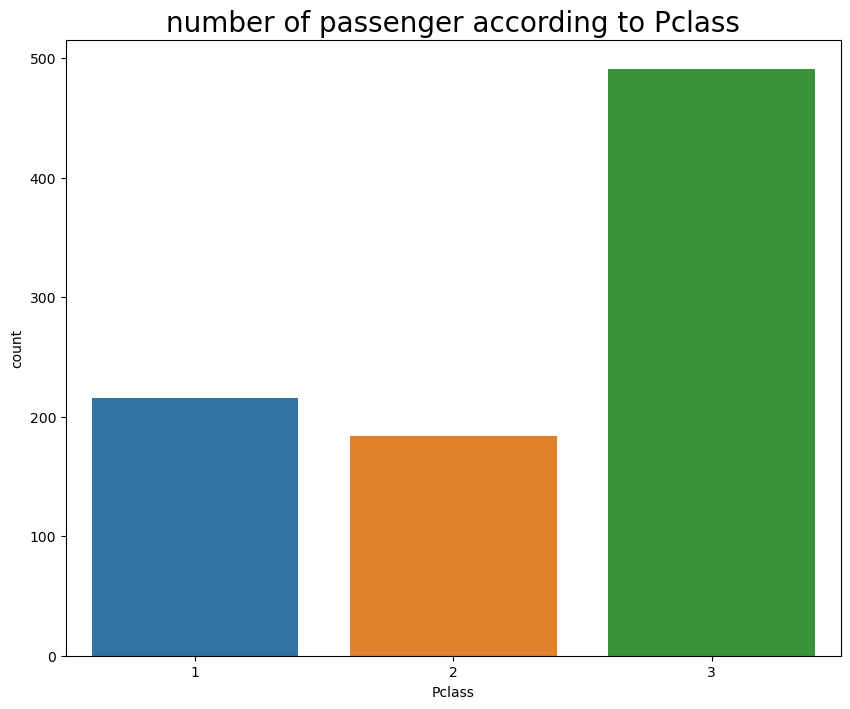

In [25]:
fig=sns.countplot(data=df,x='Pclass')

#  we can add more to make figure look more attractive

# plt.xticks(fontsize=30,rotation=50)
# plt.xlabel("pclass",fontsize=20,color='black')
# plt.ylabel("count",fontsize=20)
plt.title("number of passenger according to Pclass",fontsize=20)

In [27]:
df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

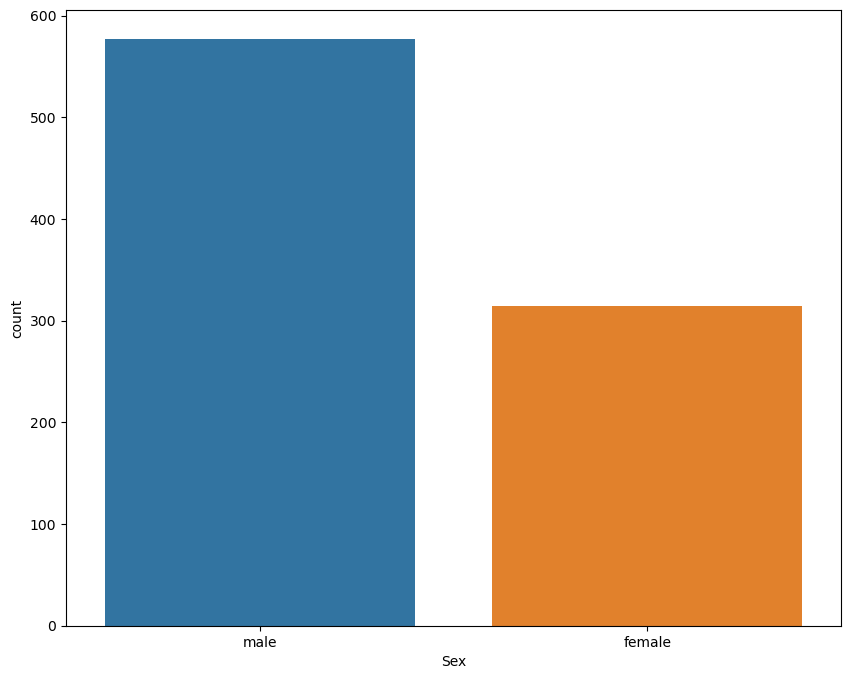

In [36]:

sns.countplot(x='Sex', data=df)


In [44]:
df.groupby(['Sex','Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

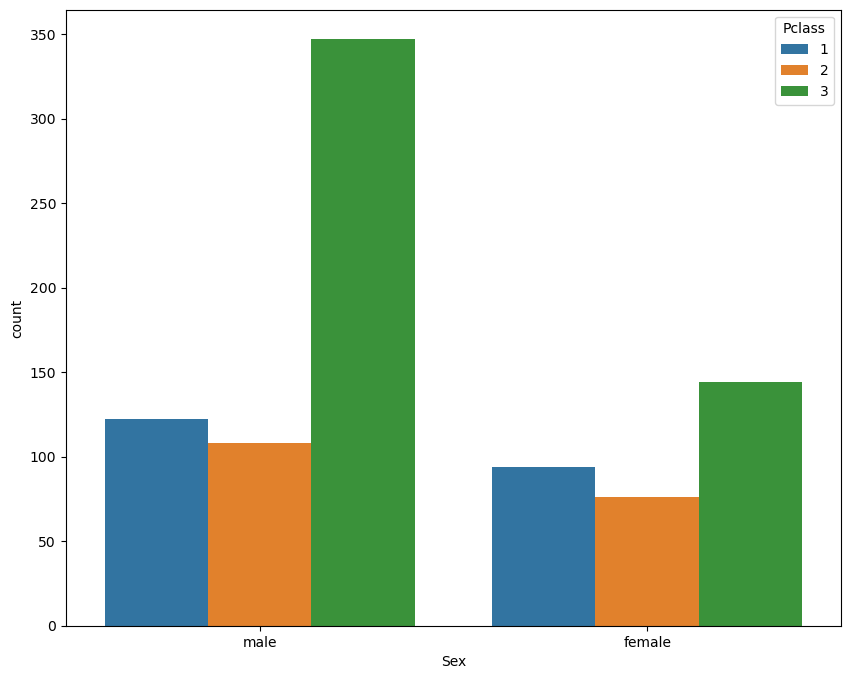

In [45]:
sns.countplot(x="Sex",data=df,hue="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

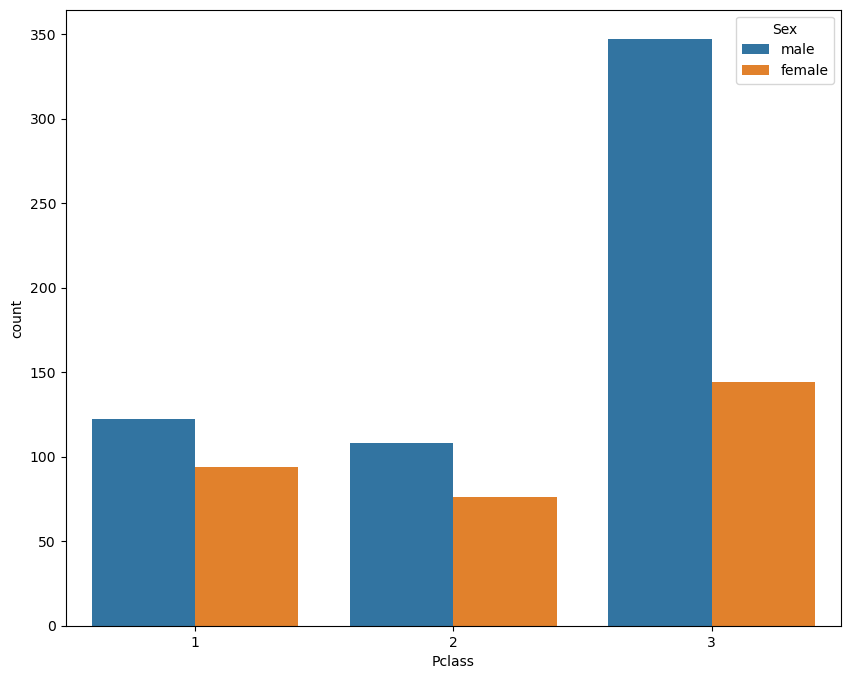

In [46]:
sns.countplot(x="Pclass",data=df,hue='Sex')

In [62]:
#  number of passenger who survived in each class gropuby sex

df.pivot_table('Survived', 'Sex', 'Pclass',aggfunc=np.sum,margins=True )
# margin = true  rhakda all pani aayo 

Pclass,1,2,3,All
Sex,,,,
female,91.0,70.0,72.0,233.0
male,45.0,17.0,47.0,109.0
All,136.0,87.0,119.0,342.0


<Axes: xlabel='Survived', ylabel='count'>

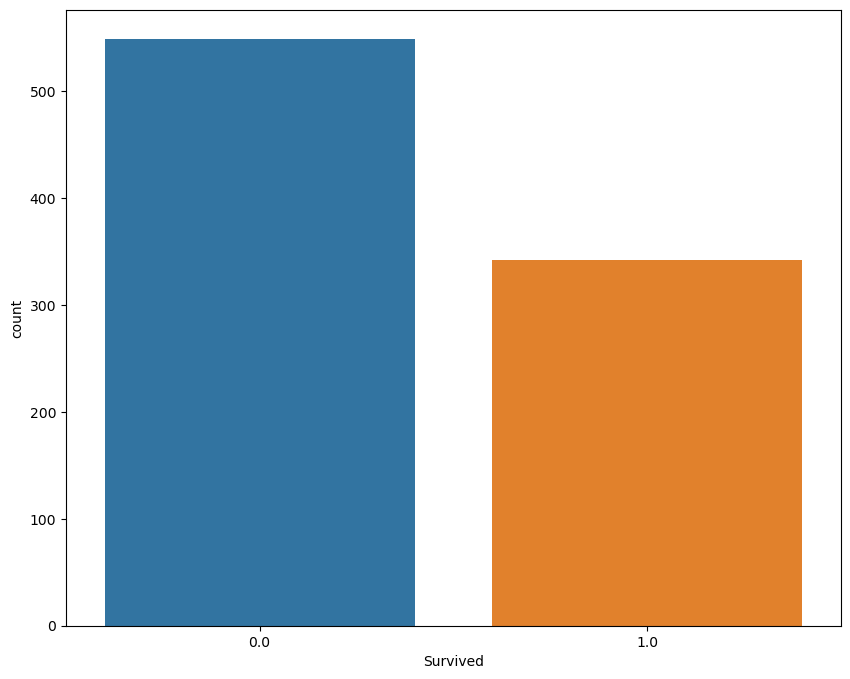

In [53]:
sns.countplot(x="Survived",data=df)

In [55]:
not_survived=df[df["Survived"]==0]
len(not_survived)

549

In [63]:
#  number of passenger who do not survived in each class grouped by Sex
not_survived.pivot_table('Survived','Sex','Pclass',aggfunc=len,margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [67]:
# passenger who survived and who donit survived gropu by clas

table=pd.crosstab(index=[df.Survived,df.Pclass],columns=[df.Sex,df.Embarked])
table.unstack()

Sex      female                              male                              
Embarked      C         Q          S            C         Q          S         
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2    3
Survived                                                                       
0.0           1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82  231
1.0          43  7  15  1  2  24  47  61  33   17  2  10  0  0   3  28  15   34

In [83]:
print('average and median age of passsenger are %0.f and %0.f year respectively'%(df.Age.mean(),df.Age.median()))


average and median age of passsenger are 29 and 30 year respectively


In [84]:
df.Age.describe()

count    891.000000
mean      29.445196
std       13.244896
min        0.420000
25%       22.000000
50%       30.000000
75%       35.500000
max       80.000000
Name: Age, dtype: float64

In [88]:
df.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [90]:
age=df["Age"].dropna()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18612\345566046.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  age_dist =sns.distplot(age)


Text(0.5, 1.0, "distribution of passenger's age")

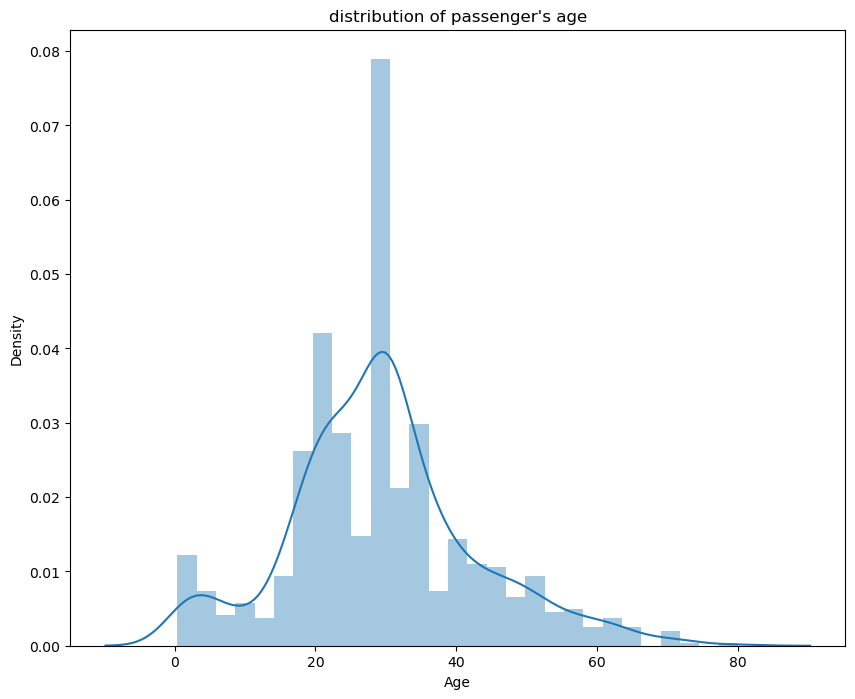

In [95]:
#  destribution of age with an overlay of density plot 
age_dist =sns.distplot(age)
age_dist.set_title("distribution of passenger's age")


<Axes: >

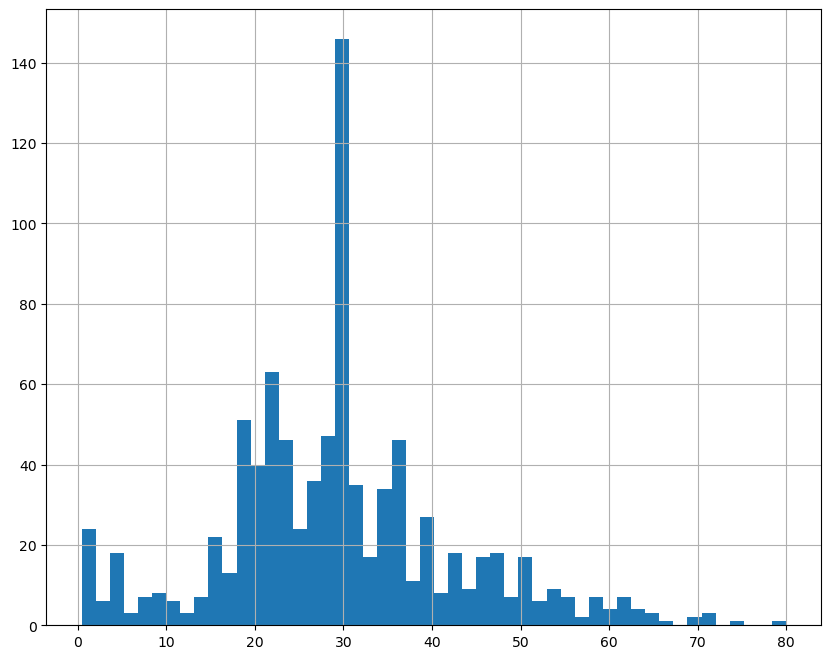

In [96]:
#  an other  way to plot histogram is shown below  form matplot
 
df['Age'].hist(bins=50)

(array([ 58.,  46., 213., 288., 135.,  70.,  46.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

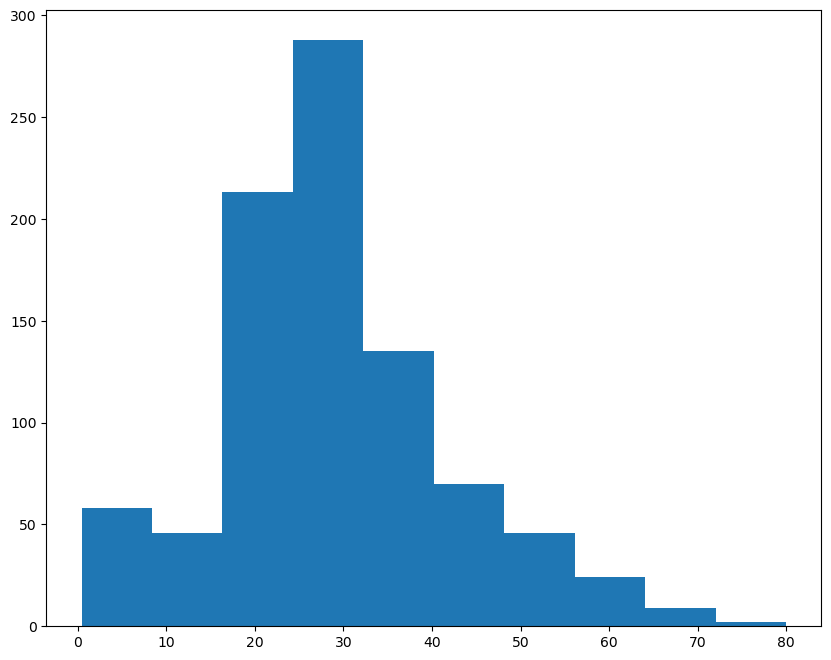

In [97]:
plt.hist(df['Age'])

In [100]:
#  create a function to define those who are children (less then 16:)
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return "child"
    else:
        return sex 

#  now lets add a new column  in dataframe 
df['Person']=df[['Age','Sex']].apply(male_female_child,axis=1)


In [101]:
df[:3]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,Person
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,male
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,female
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,female


In [103]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size',
       'Person'],
      dtype='object')

In [116]:
#  count number of man woman and children 
print(df['Person'].unique())
df['Person'].value_counts()


['male' 'female' 'child']


male      533
female    271
child      87
Name: Person, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

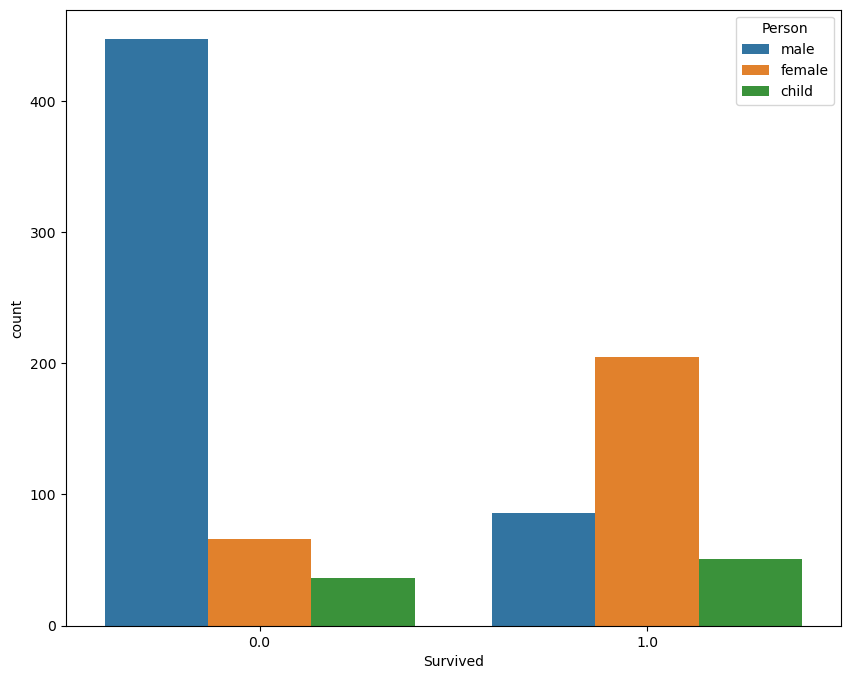

In [122]:
sns.countplot(x='Pclass',data=df,hue="Person")

In [127]:
# kde plot 
#  distribution of passenger's Age 
#  groupoed by Gender 
